In [1]:
pip install pandas

In [2]:
import pandas as pd
import numpy as np

Modify Filepath variable to get from local

In [3]:
filepath = "housing_data (1).csv"
housing_Data = pd. read_csv(filepath)

# Question 1 - Showing first few rows in the dataset

In [4]:
housing_Data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## Question 2 - 

##How many data samples are present in the dataset? What attributes/features are continuous valued? Which attributes are categorical?

No. of samples/ rows in the dataset

In [5]:
len(housing_Data)

4600

In [6]:
housing_Data.count()

date             4600
price            4600
bedrooms         4600
bathrooms        4600
sqft_living      4600
sqft_lot         4600
floors           4600
waterfront       4600
view             4600
condition        4600
sqft_above       4600
sqft_basement    4600
yr_built         4600
yr_renovated     4600
street           4600
city             4600
statezip         4600
country          4600
dtype: int64

#### Attributes/Features in the dataset

In [7]:
housing_Data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [8]:
housing_Data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Checking unique values in all column to help us determine which ones are categorical or continuous


In [9]:
housing_Data.astype('object').describe(include='all').loc['unique', :]

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
Name: unique, dtype: object

#### The continuous valued columns in this dataset are - 
1. sqft_living 2. sqft_lot 3. sqft_above 4. sqft_basement 5. yr_built 6. yr_renovated 7. bedrooms           8. bathrooms 9.floors


#### The categorical valued columns in this dataset are - 
1. waterfront       2. view 3. condition 4. city 5. statezip

### The reason we considered bathrooms,bedrooms and floors as continuous variables and not categorised is beacuse even though the range of values seem to be less it's unclear whether the new test values can be outside this range. To be sure we tested taking these features as categorical attributes and it did not make much of a difference to the accuracy and the error rate and hence we went ahead with considering them as continuos variables and standardised and normalised it.


# Question 3 - Dropping Columns/ Attributes

In [10]:
housing_Data.drop(columns = ['date','street','country'],axis = 1, inplace = True)
housing_Data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city', 'statezip'],
      dtype='object')

# Question 4 - Displayng column statistics

## Removing Outliers - Above the 3rd Standard Deviation from the Mean

###The reason we are doing this is because there are very few prices of the houses which are way beyond the 3rd standard deviation and removing it will improve the accuracy and the analysis of the data using the graphical representation.

In [11]:
mean_y,std_y=housing_Data["price"].mean(),housing_Data["price"].std()
cut_off=std_y*3
lower=mean_y-cut_off
upper=mean_y+cut_off
outliers=[x for x in housing_Data["price"] if x<lower or x>upper]
for x in outliers:
  housing_Data.drop(housing_Data[housing_Data["price"]==x].index,inplace=True)
housing_Data.reset_index(drop=True,inplace=True)

In [12]:
housing_Data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.566000e+03,4566.000000,4566.000000,4566.000000,4.566000e+03,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000
mean,5.272448e+05,3.393123,2.147668,2115.666010,1.477236e+04,1.509746,0.005694,0.229085,3.450942,1810.408673,305.257337,1970.787560,809.375164
std,3.053655e+05,0.903364,0.762967,903.268039,3.574062e+04,0.537797,0.075253,0.757348,0.676067,830.905298,448.625012,29.699517,979.550405
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.202500e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.599950e+05,3.000000,2.250000,1970.000000,7.663000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.500000e+05,4.000000,2.500000,2600.000000,1.092000e+04,2.000000,0.000000,0.000000,4.000000,2290.000000,600.000000,1997.000000,1999.000000
max,2.238888e+06,9.000000,6.500000,8020.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,2850.000000,2014.000000,2014.000000


Plots of Distributions for each Attribute

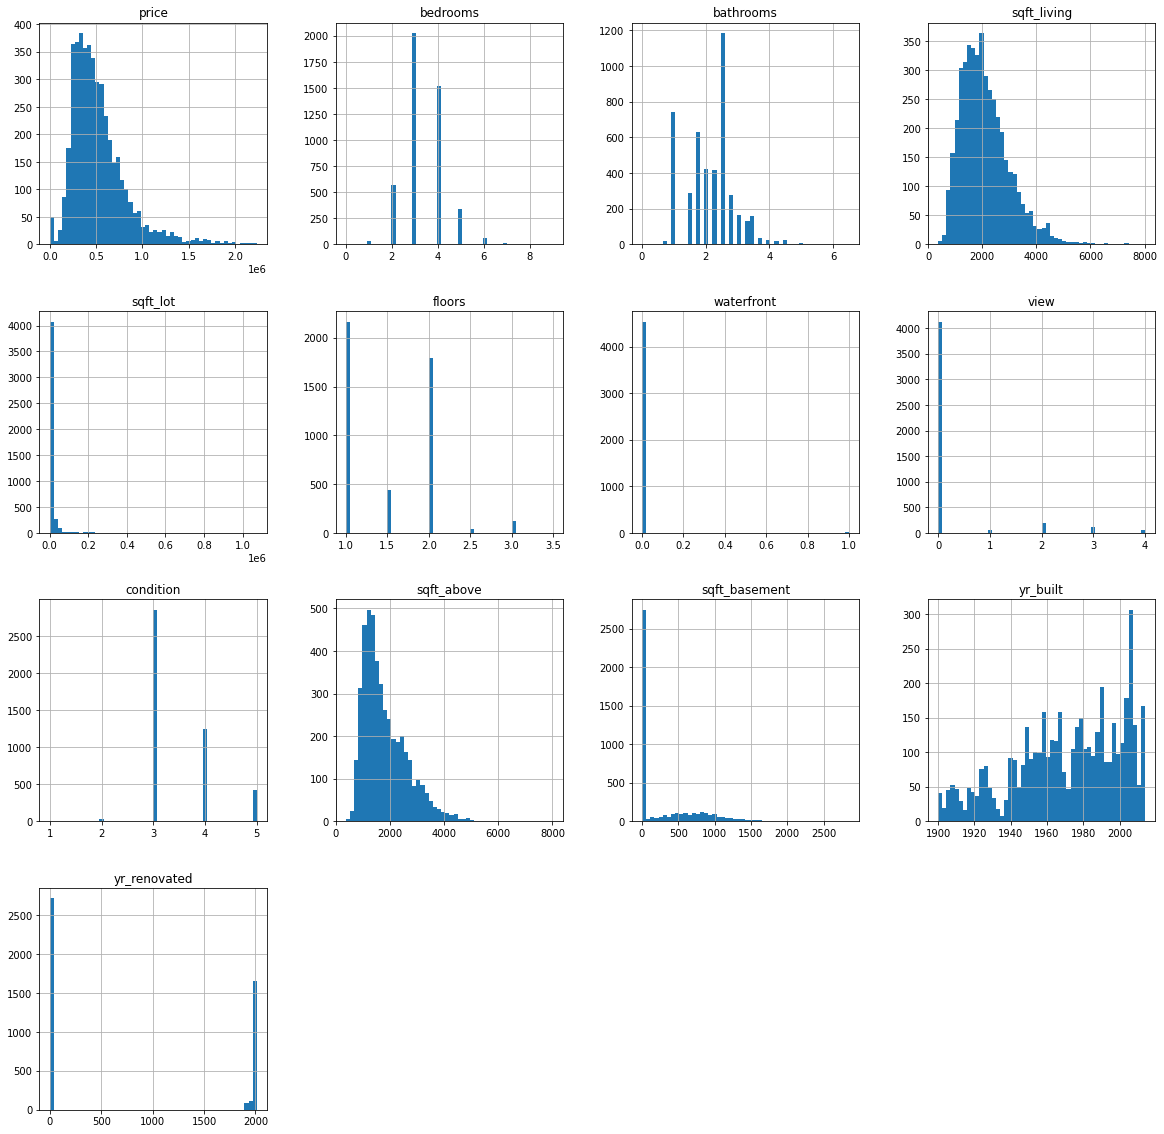

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_Data.hist(bins=50, figsize=(20,20))
plt.show()

#### Noticable traits in the price attribute - Some of the prices were much bigger than trice the standard deviation of the distribution, and as seen in the histograms can obscure the range of the price. Hence we removed these rows above 3rd Standard deviation as outliers. 

#### Most of the samples have sqft_lot, sqft_basement and waterfront as 0, as seen in the histogram.

#### The features/ attributes 'City', 'StateZip' require special treatement as they are in text and code format respectively. Performing LabelEncoding followed by One Hot encoding will give us input vector of 0's and 1's for each unique city or statezip value. 


# Question 5 - Mean and Median for non-zero instances

Mean Value - Function


In [14]:
mean_value=housing_Data[housing_Data["price"]!=0].sum()["price"]/len(housing_Data[housing_Data["price"]!=0])
#housing_Data["price"].mean()

Median Value -Function


In [15]:
median_value=housing_Data[housing_Data["price"]!=0].sort_values(by="price").iloc[round(len(housing_Data[housing_Data["price"]!=0])/2)].price
#housing_Data["price"].median()

# Question 6- Creating and Plotting the three instances of the dataset



In [16]:
housing_zero_removed=housing_Data[housing_Data["price"]!=0] 
housing_zero_removed.reset_index(drop=True,inplace=True)
housing_mean=housing_Data.copy()
housing_mean.loc[housing_Data["price"]==0,"price"]=mean_value
housing_median=housing_Data.copy()
housing_median.loc[housing_Data["price"]==0,"price"]=median_value

Text(0, 0.5, 'Count')

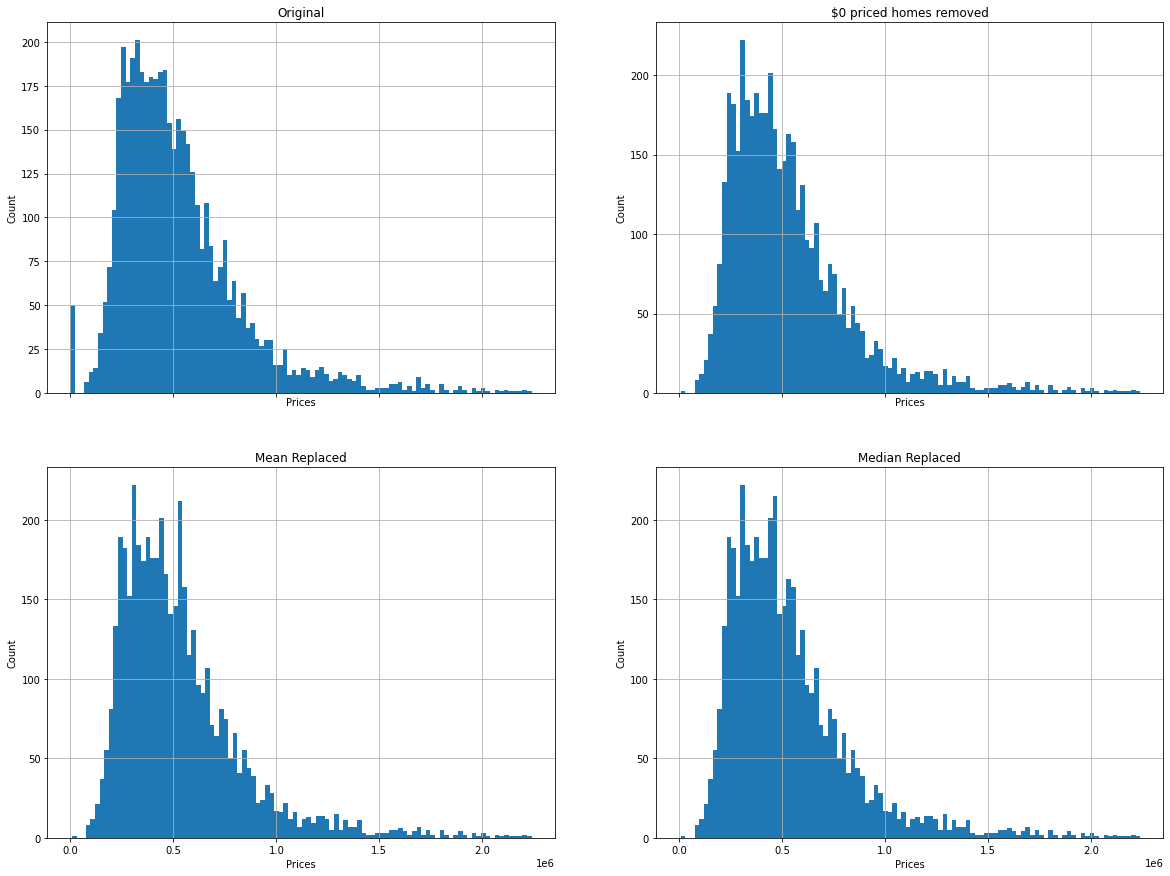

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, sharex = True, figsize=(20,15))

ax1=housing_Data['price'].hist(ax=axes[0,0], bins = 100)
ax1.set_title("Original")
ax1.set_xlabel("Prices")
ax1.set_ylabel("Count")
ax2=housing_zero_removed['price'].hist(ax=axes[0,1], bins = 100)
ax2.set_title("$0 priced homes removed")
ax2.set_xlabel("Prices")
ax2.set_ylabel("Count")
ax3=housing_mean['price'].hist(ax=axes[1,0], bins = 100)
ax3.set_title("Mean Replaced")
ax3.set_xlabel("Prices")
ax3.set_ylabel("Count")
ax4=housing_median['price'].hist(ax=axes[1,1], bins= 100)
ax4.set_title("Median Replaced")
ax4.set_xlabel("Prices")
ax4.set_ylabel("Count")


# Question 7 - 2D Scatter plot

Dependency of target (price) on features/attributes - Original Dataset





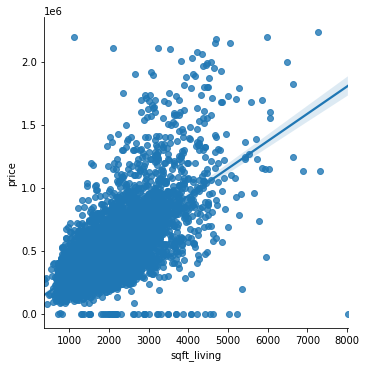

In [18]:
import seaborn as sns
sns.lmplot(data=housing_Data,x="sqft_living", y="price")

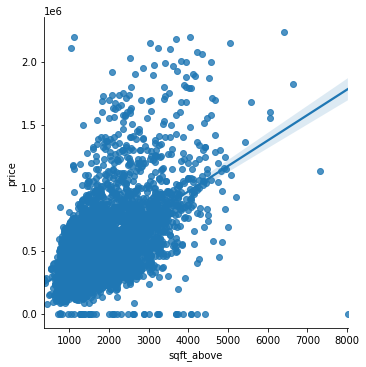

In [19]:
sns.lmplot(data=housing_Data,x="sqft_above", y="price")

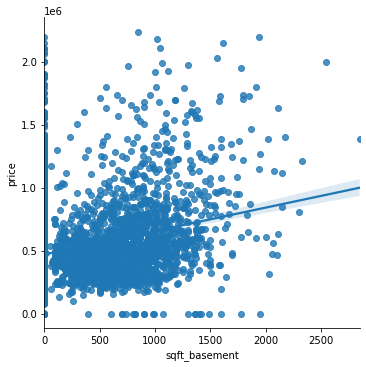

In [20]:
sns.lmplot(data=housing_Data,x="sqft_basement", y="price")

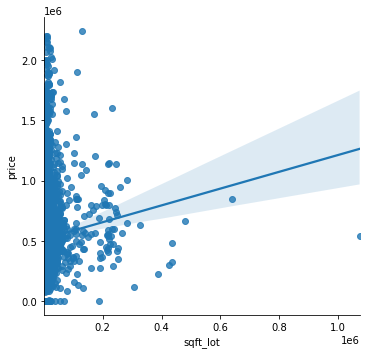

In [21]:
sns.lmplot(data=housing_Data,x="sqft_lot", y="price")

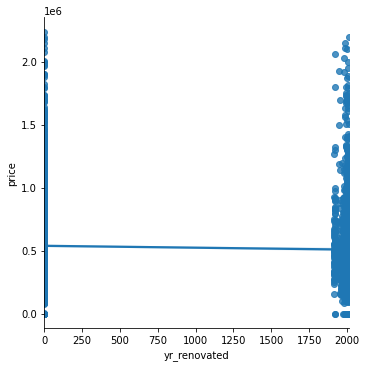

In [22]:
sns.lmplot(data=housing_Data,x="yr_renovated", y="price")

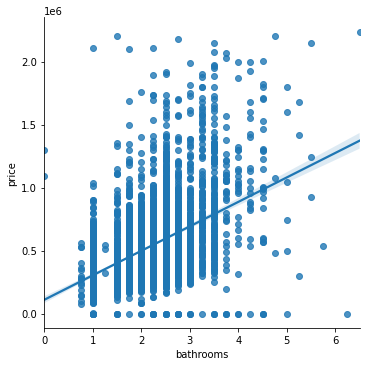

In [23]:
sns.lmplot(data=housing_Data,x="bathrooms", y="price")

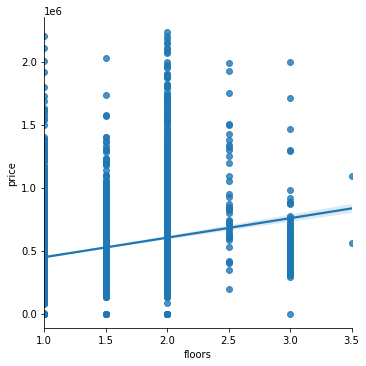

In [24]:
sns.lmplot(data=housing_Data,x="floors", y="price")

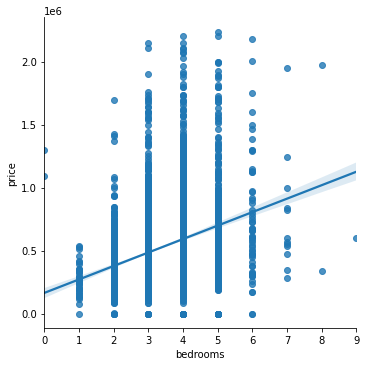

In [25]:
sns.lmplot(data=housing_Data,x="bedrooms", y="price")

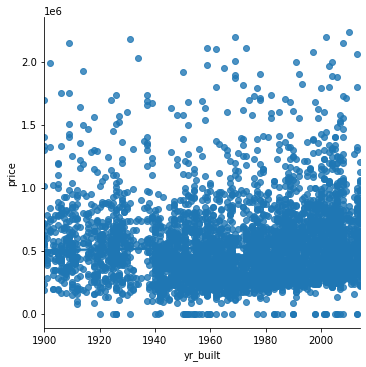

In [26]:
sns.lmplot(data=housing_Data,x="yr_built", y="price")

Dependency of target (price) on features/attributes - $0 removed


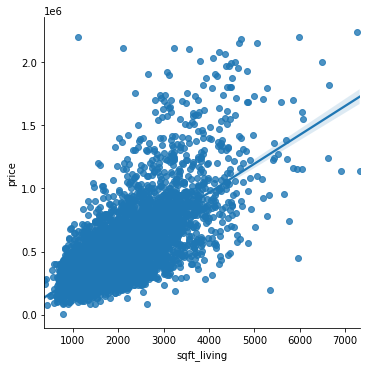

In [27]:
sns.lmplot(data=housing_zero_removed,x="sqft_living", y="price")

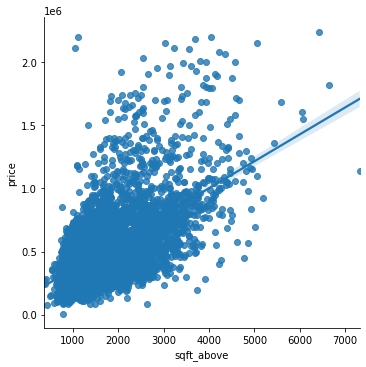

In [28]:
sns.lmplot(data=housing_zero_removed,x="sqft_above", y="price")

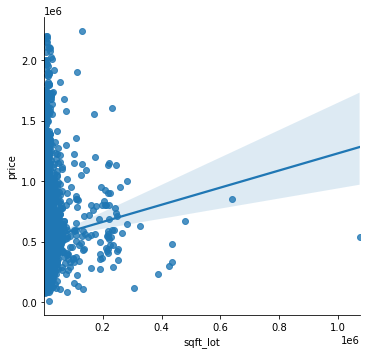

In [29]:
sns.lmplot(data=housing_zero_removed,x="sqft_lot", y="price")

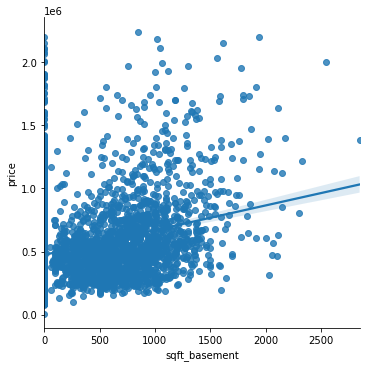

In [30]:
sns.lmplot(data=housing_zero_removed,x="sqft_basement", y="price")

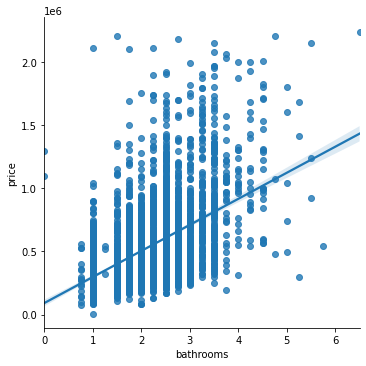

In [31]:
sns.lmplot(data=housing_zero_removed,x="bathrooms", y="price")

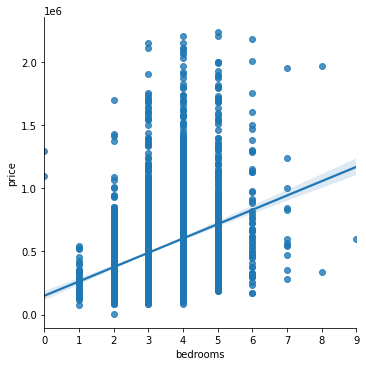

In [32]:
sns.lmplot(data=housing_zero_removed,x="bedrooms", y="price")

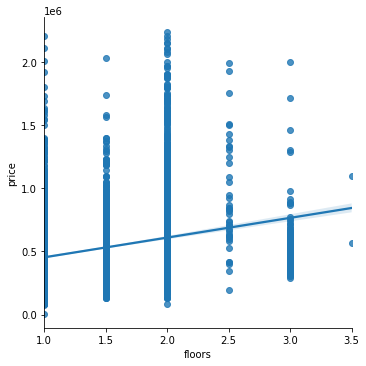

In [33]:
sns.lmplot(data=housing_zero_removed,x="floors", y="price")

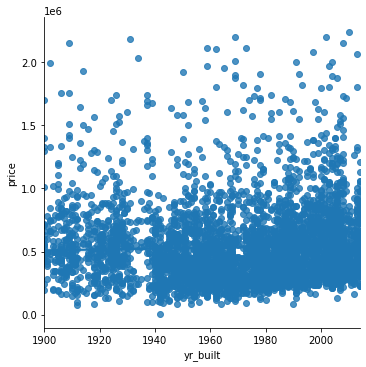

In [34]:
sns.lmplot(data=housing_zero_removed,x="yr_built", y="price")

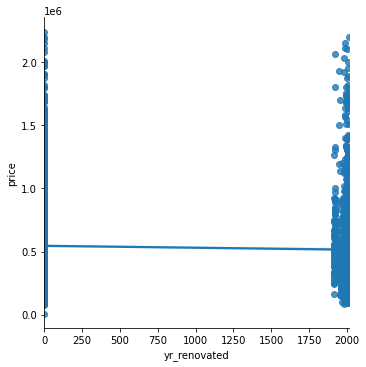

In [35]:
sns.lmplot(data=housing_zero_removed,x="yr_renovated", y="price")

Dependency of target (price) on features/attributes - Median

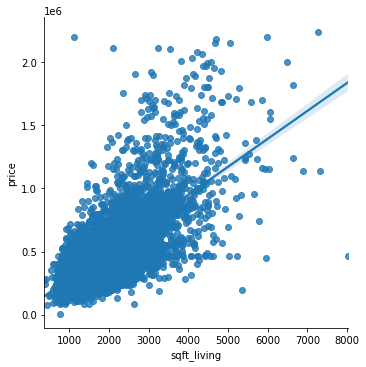

In [36]:
import seaborn as sns
sns.lmplot(data=housing_median,x="sqft_living", y="price")

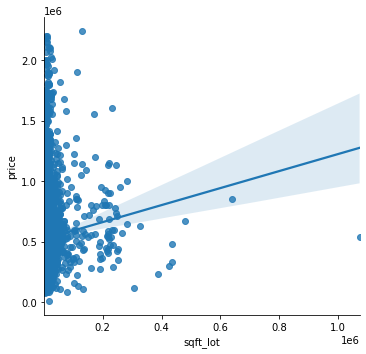

In [37]:
import seaborn as sns
sns.lmplot(data=housing_median,x="sqft_lot", y="price")

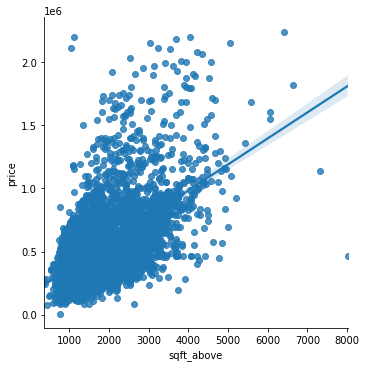

In [38]:
import seaborn as sns
sns.lmplot(data=housing_median,x="sqft_above", y="price")

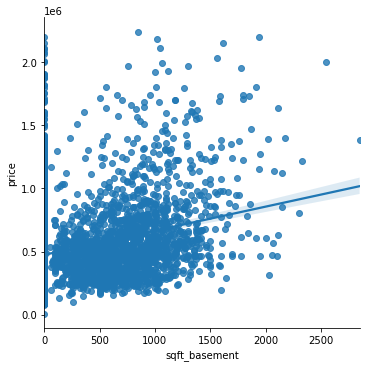

In [39]:
import seaborn as sns
sns.lmplot(data=housing_median,x="sqft_basement", y="price")

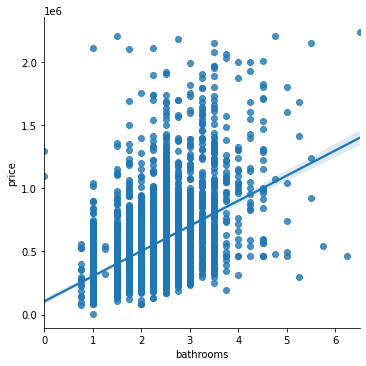

In [40]:
sns.lmplot(data=housing_median,x="bathrooms", y="price")

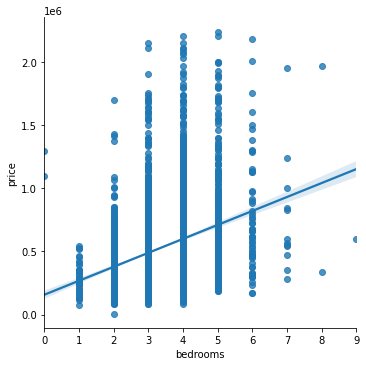

In [41]:
sns.lmplot(data=housing_median,x="bedrooms", y="price")

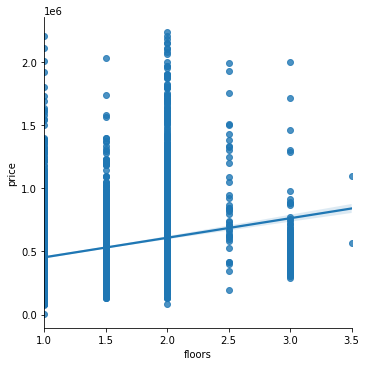

In [42]:
sns.lmplot(data=housing_median,x="floors", y="price")

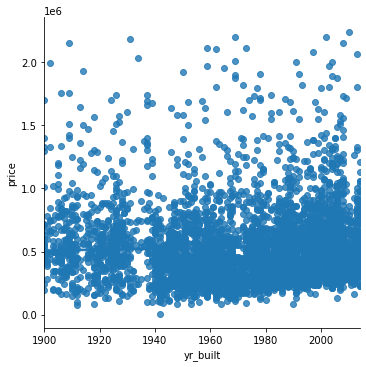

In [43]:
sns.lmplot(data=housing_median,x="yr_built", y="price")

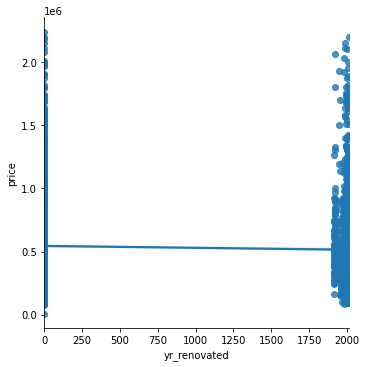

In [44]:
sns.lmplot(data=housing_median,x="yr_renovated", y="price")

Dependency of target (price) on features/attributes - Mean

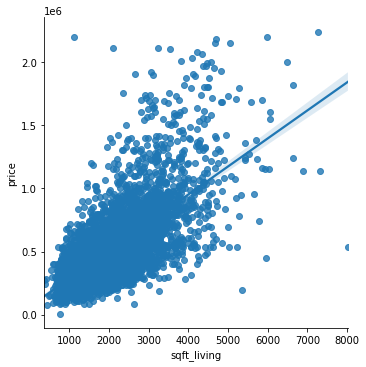

In [45]:
import seaborn as sns
sns.lmplot(data=housing_mean,x="sqft_living", y="price")

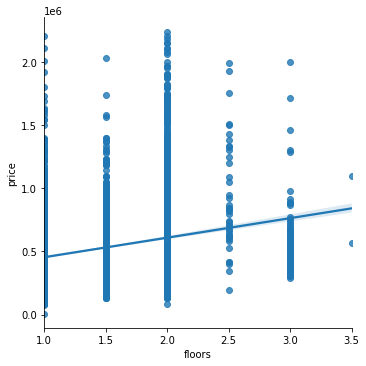

In [46]:
sns.lmplot(data=housing_mean,x="floors", y="price")

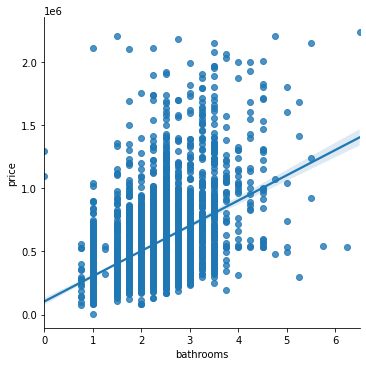

In [47]:
sns.lmplot(data=housing_mean,x="bathrooms", y="price")

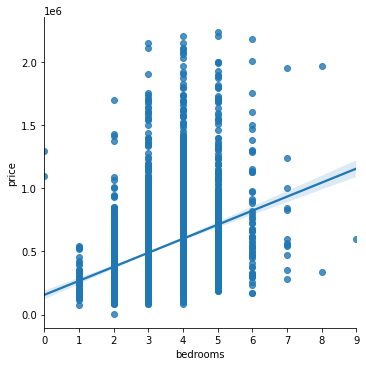

In [48]:
sns.lmplot(data=housing_mean,x="bedrooms", y="price")

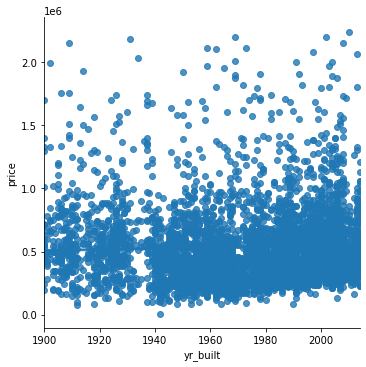

In [49]:
sns.lmplot(data=housing_mean,x="yr_built", y="price")

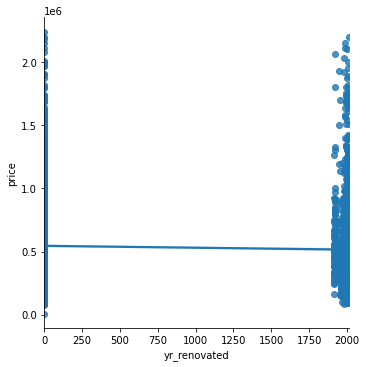

In [50]:
sns.lmplot(data=housing_mean,x="yr_renovated", y="price")

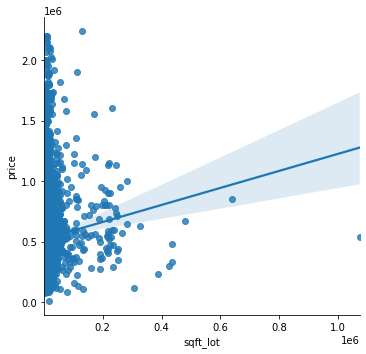

In [51]:
import seaborn as sns
sns.lmplot(data=housing_mean,x="sqft_lot", y="price")

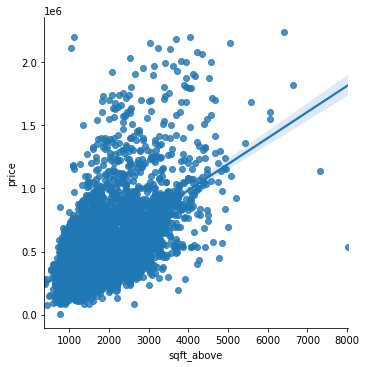

In [52]:
import seaborn as sns
sns.lmplot(data=housing_mean,x="sqft_above", y="price")

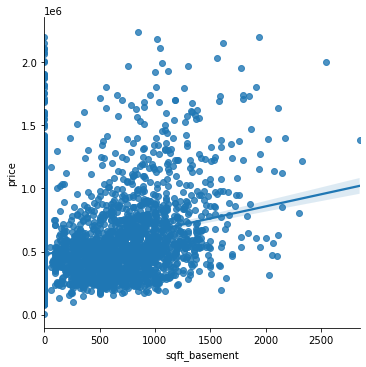

In [53]:
import seaborn as sns
sns.lmplot(data=housing_mean,x="sqft_basement", y="price")

#### From the scatter plots of the continuous variables, it is clear that the following attributes have a high correlation with the "price" attribute - sqft_living , sqft_above and bathrooms, since most of the samples seem to be falling on a straight line. While for the sqft_lot feature most of the prices fall on a horizontal line, suggesting that price is not very dependent on the sqft_lot. The same follows for bedrooms and floors. The sqft_basement values are wide spread on the scatter plot which seem to have lesser correlation. This is the same for the Yr_Built feature as well. The yr_renovated feature seems to be negatively correlated to price which seems to be a bad feature for the evalution of the model.



# Question 8 - Correlation Coefficient

In [54]:
import math
def corr_compute(x,y):
  x_mean=x[y].mean()
  price_mean=x["price"].mean()
  numerator=sum((x[y]-x_mean)*(x["price"]-price_mean))
  denominator=math.sqrt(sum((x[y]-x_mean)**2)*sum((x["price"]-price_mean)**2))
  correlation_coefficiant=numerator/denominator
  return (correlation_coefficiant)

Correlation with the Original Housing Data

In [55]:
corr_compute(housing_Data,"sqft_living") #sqft_living

0.6418628391011983

In [56]:
corr_compute(housing_Data,"sqft_lot") #sqft_lot

0.08128678937671661

In [57]:
corr_compute(housing_Data,"sqft_above") #sqft_above

0.5503886543642434

In [58]:
corr_compute(housing_Data,"sqft_basement") #sqft_basement

0.2729525457288498

In [59]:
corr_compute(housing_Data,"yr_built")

0.03241959526212106

In [60]:
corr_compute(housing_Data,"yr_renovated")

-0.04763850724501959

In [61]:
corr_compute(housing_Data,"bedrooms")

0.3161734233183821

In [62]:
corr_compute(housing_Data,"bathrooms")

0.48529658211079213

In [63]:
corr_compute(housing_Data,"floors")

0.2725620141142121

Correlation with Zero Removed Dataset

In [64]:
corr_compute(housing_zero_removed,"sqft_living") #sqft_basement

0.6767638958128598

In [65]:
corr_compute(housing_zero_removed,"sqft_lot") #sqft_basement

0.08379674678140137

In [66]:
corr_compute(housing_zero_removed,"sqft_above") #sqft_basement

0.5796711488414451

In [67]:
corr_compute(housing_zero_removed,"yr_built")

0.03254411946544543

In [68]:
corr_compute(housing_zero_removed,"yr_renovated")

-0.04862451207800188

In [69]:
corr_compute(housing_zero_removed,"bedrooms")

0.3372367534500886

In [70]:
corr_compute(housing_zero_removed,"bathrooms")

0.5152676944261737

In [71]:
corr_compute(housing_zero_removed,"floors")

0.27810802336938784

In [72]:
corr_compute(housing_zero_removed,"sqft_basement")

0.2884959575717973

Correlation with Mean Dataset 

In [73]:
corr_compute(housing_mean,"sqft_living")

0.6666601859671225

In [74]:
corr_compute(housing_mean,"sqft_lot")

0.083529940072708

In [75]:
corr_compute(housing_mean,"sqft_above")

0.5706355341760984

In [76]:
corr_compute(housing_mean,"sqft_basement")

0.2853803217645072

In [77]:
corr_compute(housing_mean,"yr_built")

0.03239963097429833

In [78]:
corr_compute(housing_mean,"yr_renovated")

-0.04836326410130337

In [79]:
corr_compute(housing_mean,"bedrooms")

0.33377835767598707

In [80]:
corr_compute(housing_mean,"bathrooms")

0.5071025542336298

In [81]:
corr_compute(housing_mean,"floors")

0.27673499529115125

Correlation with Median Dataset

In [82]:
corr_compute(housing_median,"sqft_living")

0.6646102716206271

In [83]:
corr_compute(housing_median,"sqft_lot")

0.08338834275545563

In [84]:
corr_compute(housing_median,"sqft_above")

0.5690114557062821

In [85]:
corr_compute(housing_median,"sqft_basement")

0.2842609755541402

In [86]:
corr_compute(housing_median,"yr_built")

0.032463449569109425

In [87]:
corr_compute(housing_median,"yr_renovated")

-0.04835786005975278

In [88]:
corr_compute(housing_median,"bedrooms")

0.33205967128716674

In [89]:
corr_compute(housing_median,"bathrooms")

0.5051505547288924

In [90]:
corr_compute(housing_median,"floors")

0.27670061576328964

#### The correlation coefficients calculated seem to be in agreement with the visual inspection done in the previous question using the scatter plot. Target attribte Price has a strong correlation with 'sqft_living', 'sqft_above' and 'bathroms' with values around 0.7, 0.6 and 0.5  respectively (for all the datasets), while it has a weaker correlation with the attributes like 'sqft_lot' and 'sqft_basement', with values near 0.3. It also shows a negative correlation with the 'yr_renovated' attribute as deduced from the scatter plot. 

####There are 4 datasets - 1. Original, 2. Zero Removed, 3. Zero Replaced with Median 4. Zero Replaced with Mean. All the correlation coefficient values are increased for the zero-removed, mean, median datasets because most of the sample Prices are around the median and mean value, hence this increases the linear relation as well.

# Question 9  - OneHotEncoder

#### The attributes which are to be one-hot encoded are - View, Condition and StateZip. By counting the no. of unique values in View(5), Condition(5) ,Statezip(77) , our feature set/ Attributes will not get too large by adding 10 new columns of View and Condition, while for statezip, though the number of columns to be added is large but it did lower the mean absolute error by a significant amount and hence we decided to keep it. OneHotEncoding is required after LabelEncoding for Statezip as it is in the non-numeric format. One-hot encoding will give us binary represenation of the categorical variables. The unique values of View (0 - 4), condition (1 - 5),StateZip are better represented as binary vectors because difference between the values is better shown in binary form, where each sample has one of the attribute values. Even though "city" is a category variable as well, we only labelencoded it, as it did not make a difference after one hot encoding it and it would only increase the number of columns by 44 unnecessarily and we wanted to reduce the dimensionality as much as possible, hence did not one hot encode the 'city' attribute. The Waterfront feature has only two values 0 and a 1 and hence there was no reason to One hot encode it.

One hot Encoded Categorical Variables - View, Condition, StateZip

Label Encoded Categorical variable - City






In [91]:
import sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder

Original Dataset

In [92]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
pd.options.mode.chained_assignment = None

label=LabelEncoder()
encoder = OneHotEncoder()

#city
city_labeled=label.fit_transform(housing_Data["city"])
housing_Data["city"]=city_labeled
#statezip
zip_labeled=label.fit_transform(housing_Data["statezip"])
ohe_zip=encoder.fit_transform(zip_labeled.reshape(-1,1))
ohe_zip=pd.DataFrame(ohe_zip.toarray(), columns=["zip"+ i for i in encoder.get_feature_names()])
#view
transformed=encoder.fit_transform(np.array(housing_Data['view']).reshape(-1,1))
ohe_view = pd.DataFrame(transformed.toarray(), columns=["view"+ i for i in encoder.get_feature_names()])
#condition
transformed=encoder.fit_transform(np.array(housing_Data['condition']).reshape(-1,1))
ohe_condition = pd.DataFrame(transformed.toarray(), columns=["condition"+ i for i in encoder.get_feature_names()])

housing_Data_Encoded=pd.concat([housing_Data,ohe_zip,ohe_view,ohe_condition], axis=1).drop(['view','condition',"statezip"], axis=1)

housing_Data_Encoded.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,city,zipx0_0,zipx0_1,zipx0_2,zipx0_3,zipx0_4,zipx0_5,zipx0_6,zipx0_7,zipx0_8,zipx0_9,zipx0_10,zipx0_11,zipx0_12,zipx0_13,zipx0_14,zipx0_15,zipx0_16,zipx0_17,zipx0_18,zipx0_19,zipx0_20,zipx0_21,zipx0_22,zipx0_23,zipx0_24,zipx0_25,zipx0_26,zipx0_27,...,zipx0_47,zipx0_48,zipx0_49,zipx0_50,zipx0_51,zipx0_52,zipx0_53,zipx0_54,zipx0_55,zipx0_56,zipx0_57,zipx0_58,zipx0_59,zipx0_60,zipx0_61,zipx0_62,zipx0_63,zipx0_64,zipx0_65,zipx0_66,zipx0_67,zipx0_68,zipx0_69,zipx0_70,zipx0_71,zipx0_72,zipx0_73,zipx0_74,zipx0_75,zipx0_76,viewx0_0,viewx0_1,viewx0_2,viewx0_3,viewx0_4,conditionx0_1,conditionx0_2,conditionx0_3,conditionx0_4,conditionx0_5
0,313000.0,3.0,1.50,1340,7912,1.5,0,1340,0,1955,2005,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,342000.0,3.0,2.00,1930,11947,1.0,0,1930,0,1966,0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,420000.0,3.0,2.25,2000,8030,1.0,0,1000,1000,1963,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,550000.0,4.0,2.50,1940,10500,1.0,0,1140,800,1976,1992,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,490000.0,2.0,1.00,880,6380,1.0,0,880,0,1938,1994,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


$0 removed dataset

In [93]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
pd.options.mode.chained_assignment = None

label=LabelEncoder()
encoder = OneHotEncoder()

#city
city_labeled=label.fit_transform(housing_zero_removed["city"])
housing_zero_removed["city"]=city_labeled
#statezip
zip_labeled=label.fit_transform(housing_zero_removed["statezip"])
ohe_zip=encoder.fit_transform(zip_labeled.reshape(-1,1))
ohe_zip=pd.DataFrame(ohe_zip.toarray(), columns=["zip"+ i for i in encoder.get_feature_names()])
#view
transformed=encoder.fit_transform(np.array(housing_zero_removed['view']).reshape(-1,1))
ohe_view = pd.DataFrame(transformed.toarray(), columns=["view"+ i for i in encoder.get_feature_names()])
#condition
transformed=encoder.fit_transform(np.array(housing_zero_removed['condition']).reshape(-1,1))
ohe_condition = pd.DataFrame(transformed.toarray(), columns=["condition"+ i for i in encoder.get_feature_names()])

housing_zero_removed_Encoded=pd.concat([housing_zero_removed,ohe_zip,ohe_view,ohe_condition], axis=1).drop(['view','condition',"statezip"], axis=1)

housing_zero_removed_Encoded.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,city,zipx0_0,zipx0_1,zipx0_2,zipx0_3,zipx0_4,zipx0_5,zipx0_6,zipx0_7,zipx0_8,zipx0_9,zipx0_10,zipx0_11,zipx0_12,zipx0_13,zipx0_14,zipx0_15,zipx0_16,zipx0_17,zipx0_18,zipx0_19,zipx0_20,zipx0_21,zipx0_22,zipx0_23,zipx0_24,zipx0_25,zipx0_26,zipx0_27,...,zipx0_47,zipx0_48,zipx0_49,zipx0_50,zipx0_51,zipx0_52,zipx0_53,zipx0_54,zipx0_55,zipx0_56,zipx0_57,zipx0_58,zipx0_59,zipx0_60,zipx0_61,zipx0_62,zipx0_63,zipx0_64,zipx0_65,zipx0_66,zipx0_67,zipx0_68,zipx0_69,zipx0_70,zipx0_71,zipx0_72,zipx0_73,zipx0_74,zipx0_75,zipx0_76,viewx0_0,viewx0_1,viewx0_2,viewx0_3,viewx0_4,conditionx0_1,conditionx0_2,conditionx0_3,conditionx0_4,conditionx0_5
0,313000.0,3.0,1.50,1340,7912,1.5,0,1340,0,1955,2005,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,342000.0,3.0,2.00,1930,11947,1.0,0,1930,0,1966,0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,420000.0,3.0,2.25,2000,8030,1.0,0,1000,1000,1963,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,550000.0,4.0,2.50,1940,10500,1.0,0,1140,800,1976,1992,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,490000.0,2.0,1.00,880,6380,1.0,0,880,0,1938,1994,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Mean Dataset

In [94]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
pd.options.mode.chained_assignment = None

label=LabelEncoder()
encoder = OneHotEncoder()

#city
city_labeled=label.fit_transform(housing_mean["city"])
housing_mean["city"]=city_labeled
#statezip
zip_labeled=label.fit_transform(housing_mean["statezip"])
ohe_zip=encoder.fit_transform(zip_labeled.reshape(-1,1))
ohe_zip=pd.DataFrame(ohe_zip.toarray(), columns=["zip"+ i for i in encoder.get_feature_names()])
#view
transformed=encoder.fit_transform(np.array(housing_mean['view']).reshape(-1,1))
ohe_view = pd.DataFrame(transformed.toarray(), columns=["view"+ i for i in encoder.get_feature_names()])
#condition
transformed=encoder.fit_transform(np.array(housing_mean['condition']).reshape(-1,1))
ohe_condition = pd.DataFrame(transformed.toarray(), columns=["condition"+ i for i in encoder.get_feature_names()])

housing_mean_Encoded=pd.concat([housing_mean,ohe_zip,ohe_view,ohe_condition], axis=1).drop(['view','condition',"statezip"], axis=1)

housing_mean_Encoded.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,city,zipx0_0,zipx0_1,zipx0_2,zipx0_3,zipx0_4,zipx0_5,zipx0_6,zipx0_7,zipx0_8,zipx0_9,zipx0_10,zipx0_11,zipx0_12,zipx0_13,zipx0_14,zipx0_15,zipx0_16,zipx0_17,zipx0_18,zipx0_19,zipx0_20,zipx0_21,zipx0_22,zipx0_23,zipx0_24,zipx0_25,zipx0_26,zipx0_27,...,zipx0_47,zipx0_48,zipx0_49,zipx0_50,zipx0_51,zipx0_52,zipx0_53,zipx0_54,zipx0_55,zipx0_56,zipx0_57,zipx0_58,zipx0_59,zipx0_60,zipx0_61,zipx0_62,zipx0_63,zipx0_64,zipx0_65,zipx0_66,zipx0_67,zipx0_68,zipx0_69,zipx0_70,zipx0_71,zipx0_72,zipx0_73,zipx0_74,zipx0_75,zipx0_76,viewx0_0,viewx0_1,viewx0_2,viewx0_3,viewx0_4,conditionx0_1,conditionx0_2,conditionx0_3,conditionx0_4,conditionx0_5
0,313000.0,3.0,1.50,1340,7912,1.5,0,1340,0,1955,2005,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,342000.0,3.0,2.00,1930,11947,1.0,0,1930,0,1966,0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,420000.0,3.0,2.25,2000,8030,1.0,0,1000,1000,1963,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,550000.0,4.0,2.50,1940,10500,1.0,0,1140,800,1976,1992,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,490000.0,2.0,1.00,880,6380,1.0,0,880,0,1938,1994,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Median Dataset

In [95]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
pd.options.mode.chained_assignment = None

label=LabelEncoder()
encoder = OneHotEncoder()

#city
city_labeled=label.fit_transform(housing_median["city"])
housing_median["city"]=city_labeled
#statezip
zip_labeled=label.fit_transform(housing_median["statezip"])
ohe_zip=encoder.fit_transform(zip_labeled.reshape(-1,1))
ohe_zip=pd.DataFrame(ohe_zip.toarray(), columns=["zip"+ i for i in encoder.get_feature_names()])
#view
transformed=encoder.fit_transform(np.array(housing_median['view']).reshape(-1,1))
ohe_view = pd.DataFrame(transformed.toarray(), columns=["view"+ i for i in encoder.get_feature_names()])
#condition
transformed=encoder.fit_transform(np.array(housing_median['condition']).reshape(-1,1))
ohe_condition = pd.DataFrame(transformed.toarray(), columns=["condition"+ i for i in encoder.get_feature_names()])

housing_median_Encoded=pd.concat([housing_median,ohe_zip,ohe_view,ohe_condition], axis=1).drop(['view','condition',"statezip"], axis=1)

housing_median_Encoded.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,city,zipx0_0,zipx0_1,zipx0_2,zipx0_3,zipx0_4,zipx0_5,zipx0_6,zipx0_7,zipx0_8,zipx0_9,zipx0_10,zipx0_11,zipx0_12,zipx0_13,zipx0_14,zipx0_15,zipx0_16,zipx0_17,zipx0_18,zipx0_19,zipx0_20,zipx0_21,zipx0_22,zipx0_23,zipx0_24,zipx0_25,zipx0_26,zipx0_27,...,zipx0_47,zipx0_48,zipx0_49,zipx0_50,zipx0_51,zipx0_52,zipx0_53,zipx0_54,zipx0_55,zipx0_56,zipx0_57,zipx0_58,zipx0_59,zipx0_60,zipx0_61,zipx0_62,zipx0_63,zipx0_64,zipx0_65,zipx0_66,zipx0_67,zipx0_68,zipx0_69,zipx0_70,zipx0_71,zipx0_72,zipx0_73,zipx0_74,zipx0_75,zipx0_76,viewx0_0,viewx0_1,viewx0_2,viewx0_3,viewx0_4,conditionx0_1,conditionx0_2,conditionx0_3,conditionx0_4,conditionx0_5
0,313000.0,3.0,1.50,1340,7912,1.5,0,1340,0,1955,2005,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,342000.0,3.0,2.00,1930,11947,1.0,0,1930,0,1966,0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,420000.0,3.0,2.25,2000,8030,1.0,0,1000,1000,1963,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,550000.0,4.0,2.50,1940,10500,1.0,0,1140,800,1976,1992,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,490000.0,2.0,1.00,880,6380,1.0,0,880,0,1938,1994,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Question 10 - Normalization and Standardization

Continuous Valued Variables - sqft_living , sqft_lot , sqft_above ,sqft_basement ,bedrooms ,bathrooms ,floors

In [96]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

housing_Data.columns

scalar  = MinMaxScaler()

housing_Data_Normalized = housing_Data_Encoded.copy()
housing_zero_removed_Normalized = housing_zero_removed_Encoded.copy()
housing_median_Normalized = housing_median_Encoded.copy()
housing_mean_Normalized = housing_mean_Encoded.copy()

housing_Data_Normalized[["sqft_living","sqft_lot","sqft_above","sqft_basement","bedrooms","bathrooms","floors"]] = scalar.fit_transform(housing_Data_Normalized[["sqft_living","sqft_lot","sqft_above","sqft_basement","bedrooms","bathrooms","floors"]])
housing_zero_removed_Normalized[["sqft_living","sqft_lot","sqft_above","sqft_basement","bedrooms","bathrooms","floors"]] = scalar.fit_transform(housing_zero_removed_Normalized[["sqft_living","sqft_lot","sqft_above","sqft_basement","bedrooms","bathrooms","floors"]])
housing_median_Normalized[["sqft_living","sqft_lot","sqft_above","sqft_basement","bedrooms","bathrooms","floors"]] = scalar.fit_transform(housing_median_Normalized[["sqft_living","sqft_lot","sqft_above","sqft_basement","bedrooms","bathrooms","floors"]])
housing_mean_Normalized[["sqft_living","sqft_lot","sqft_above","sqft_basement","bedrooms","bathrooms","floors"]] = scalar.fit_transform(housing_mean_Normalized[["sqft_living","sqft_lot","sqft_above","sqft_basement","bedrooms","bathrooms","floors"]])


In [97]:
housing_Data_Normalized.head() #original 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,city,zipx0_0,zipx0_1,zipx0_2,zipx0_3,zipx0_4,zipx0_5,zipx0_6,zipx0_7,zipx0_8,zipx0_9,zipx0_10,zipx0_11,zipx0_12,zipx0_13,zipx0_14,zipx0_15,zipx0_16,zipx0_17,zipx0_18,zipx0_19,zipx0_20,zipx0_21,zipx0_22,zipx0_23,zipx0_24,zipx0_25,zipx0_26,zipx0_27,...,zipx0_47,zipx0_48,zipx0_49,zipx0_50,zipx0_51,zipx0_52,zipx0_53,zipx0_54,zipx0_55,zipx0_56,zipx0_57,zipx0_58,zipx0_59,zipx0_60,zipx0_61,zipx0_62,zipx0_63,zipx0_64,zipx0_65,zipx0_66,zipx0_67,zipx0_68,zipx0_69,zipx0_70,zipx0_71,zipx0_72,zipx0_73,zipx0_74,zipx0_75,zipx0_76,viewx0_0,viewx0_1,viewx0_2,viewx0_3,viewx0_4,conditionx0_1,conditionx0_2,conditionx0_3,conditionx0_4,conditionx0_5
0,313000.0,0.333333,0.230769,0.126797,0.006775,0.2,0,0.126797,0.000000,1955,2005,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,342000.0,0.333333,0.307692,0.203922,0.010534,0.0,0,0.203922,0.000000,1966,0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,420000.0,0.333333,0.346154,0.213072,0.006885,0.0,0,0.082353,0.350877,1963,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,550000.0,0.444444,0.384615,0.205229,0.009186,0.0,0,0.100654,0.280702,1976,1992,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,490000.0,0.222222,0.153846,0.066667,0.005348,0.0,0,0.066667,0.000000,1938,1994,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [98]:
housing_zero_removed_Normalized.head() #zero removed

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,city,zipx0_0,zipx0_1,zipx0_2,zipx0_3,zipx0_4,zipx0_5,zipx0_6,zipx0_7,zipx0_8,zipx0_9,zipx0_10,zipx0_11,zipx0_12,zipx0_13,zipx0_14,zipx0_15,zipx0_16,zipx0_17,zipx0_18,zipx0_19,zipx0_20,zipx0_21,zipx0_22,zipx0_23,zipx0_24,zipx0_25,zipx0_26,zipx0_27,...,zipx0_47,zipx0_48,zipx0_49,zipx0_50,zipx0_51,zipx0_52,zipx0_53,zipx0_54,zipx0_55,zipx0_56,zipx0_57,zipx0_58,zipx0_59,zipx0_60,zipx0_61,zipx0_62,zipx0_63,zipx0_64,zipx0_65,zipx0_66,zipx0_67,zipx0_68,zipx0_69,zipx0_70,zipx0_71,zipx0_72,zipx0_73,zipx0_74,zipx0_75,zipx0_76,viewx0_0,viewx0_1,viewx0_2,viewx0_3,viewx0_4,conditionx0_1,conditionx0_2,conditionx0_3,conditionx0_4,conditionx0_5
0,313000.0,0.333333,0.230769,0.139568,0.006775,0.2,0,0.139568,0.000000,1955,2005,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,342000.0,0.333333,0.307692,0.224460,0.010534,0.0,0,0.224460,0.000000,1966,0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,420000.0,0.333333,0.346154,0.234532,0.006885,0.0,0,0.090647,0.350877,1963,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,550000.0,0.444444,0.384615,0.225899,0.009186,0.0,0,0.110791,0.280702,1976,1992,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,490000.0,0.222222,0.153846,0.073381,0.005348,0.0,0,0.073381,0.000000,1938,1994,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [99]:
housing_mean_Normalized.head() #mean replaced

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,city,zipx0_0,zipx0_1,zipx0_2,zipx0_3,zipx0_4,zipx0_5,zipx0_6,zipx0_7,zipx0_8,zipx0_9,zipx0_10,zipx0_11,zipx0_12,zipx0_13,zipx0_14,zipx0_15,zipx0_16,zipx0_17,zipx0_18,zipx0_19,zipx0_20,zipx0_21,zipx0_22,zipx0_23,zipx0_24,zipx0_25,zipx0_26,zipx0_27,...,zipx0_47,zipx0_48,zipx0_49,zipx0_50,zipx0_51,zipx0_52,zipx0_53,zipx0_54,zipx0_55,zipx0_56,zipx0_57,zipx0_58,zipx0_59,zipx0_60,zipx0_61,zipx0_62,zipx0_63,zipx0_64,zipx0_65,zipx0_66,zipx0_67,zipx0_68,zipx0_69,zipx0_70,zipx0_71,zipx0_72,zipx0_73,zipx0_74,zipx0_75,zipx0_76,viewx0_0,viewx0_1,viewx0_2,viewx0_3,viewx0_4,conditionx0_1,conditionx0_2,conditionx0_3,conditionx0_4,conditionx0_5
0,313000.0,0.333333,0.230769,0.126797,0.006775,0.2,0,0.126797,0.000000,1955,2005,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,342000.0,0.333333,0.307692,0.203922,0.010534,0.0,0,0.203922,0.000000,1966,0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,420000.0,0.333333,0.346154,0.213072,0.006885,0.0,0,0.082353,0.350877,1963,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,550000.0,0.444444,0.384615,0.205229,0.009186,0.0,0,0.100654,0.280702,1976,1992,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,490000.0,0.222222,0.153846,0.066667,0.005348,0.0,0,0.066667,0.000000,1938,1994,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [100]:
housing_median_Normalized.head() #median replaced

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,city,zipx0_0,zipx0_1,zipx0_2,zipx0_3,zipx0_4,zipx0_5,zipx0_6,zipx0_7,zipx0_8,zipx0_9,zipx0_10,zipx0_11,zipx0_12,zipx0_13,zipx0_14,zipx0_15,zipx0_16,zipx0_17,zipx0_18,zipx0_19,zipx0_20,zipx0_21,zipx0_22,zipx0_23,zipx0_24,zipx0_25,zipx0_26,zipx0_27,...,zipx0_47,zipx0_48,zipx0_49,zipx0_50,zipx0_51,zipx0_52,zipx0_53,zipx0_54,zipx0_55,zipx0_56,zipx0_57,zipx0_58,zipx0_59,zipx0_60,zipx0_61,zipx0_62,zipx0_63,zipx0_64,zipx0_65,zipx0_66,zipx0_67,zipx0_68,zipx0_69,zipx0_70,zipx0_71,zipx0_72,zipx0_73,zipx0_74,zipx0_75,zipx0_76,viewx0_0,viewx0_1,viewx0_2,viewx0_3,viewx0_4,conditionx0_1,conditionx0_2,conditionx0_3,conditionx0_4,conditionx0_5
0,313000.0,0.333333,0.230769,0.126797,0.006775,0.2,0,0.126797,0.000000,1955,2005,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,342000.0,0.333333,0.307692,0.203922,0.010534,0.0,0,0.203922,0.000000,1966,0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,420000.0,0.333333,0.346154,0.213072,0.006885,0.0,0,0.082353,0.350877,1963,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,550000.0,0.444444,0.384615,0.205229,0.009186,0.0,0,0.100654,0.280702,1976,1992,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,490000.0,0.222222,0.153846,0.066667,0.005348,0.0,0,0.066667,0.000000,1938,1994,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [101]:
scalar  = StandardScaler()

housing_Data_Standardized = housing_Data_Encoded.copy()
housing_zero_removed_Standardized = housing_zero_removed_Encoded.copy()
housing_median_Standardized = housing_median_Encoded.copy()
housing_mean_Standardized = housing_mean_Encoded.copy()


housing_Data_Standardized[["sqft_living","sqft_lot","sqft_above","sqft_basement","bedrooms","bathrooms","floors"]] = scalar.fit_transform(housing_Data_Standardized[["sqft_living","sqft_lot","sqft_above","sqft_basement","bedrooms","bathrooms","floors"]])
housing_zero_removed_Standardized[["sqft_living","sqft_lot","sqft_above","sqft_basement","bedrooms","bathrooms","floors"]] = scalar.fit_transform(housing_zero_removed_Standardized[["sqft_living","sqft_lot","sqft_above","sqft_basement","bedrooms","bathrooms","floors"]])
housing_median_Standardized[["sqft_living","sqft_lot","sqft_above","sqft_basement","bedrooms","bathrooms","floors"]] = scalar.fit_transform(housing_median_Standardized[["sqft_living","sqft_lot","sqft_above","sqft_basement","bedrooms","bathrooms","floors"]])
housing_mean_Standardized[["sqft_living","sqft_lot","sqft_above","sqft_basement","bedrooms","bathrooms","floors"]] = scalar.fit_transform(housing_mean_Standardized[["sqft_living","sqft_lot","sqft_above","sqft_basement","bedrooms","bathrooms","floors"]])


In [102]:
housing_Data_Standardized.head() #Original Data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,city,zipx0_0,zipx0_1,zipx0_2,zipx0_3,zipx0_4,zipx0_5,zipx0_6,zipx0_7,zipx0_8,zipx0_9,zipx0_10,zipx0_11,zipx0_12,zipx0_13,zipx0_14,zipx0_15,zipx0_16,zipx0_17,zipx0_18,zipx0_19,zipx0_20,zipx0_21,zipx0_22,zipx0_23,zipx0_24,zipx0_25,zipx0_26,zipx0_27,...,zipx0_47,zipx0_48,zipx0_49,zipx0_50,zipx0_51,zipx0_52,zipx0_53,zipx0_54,zipx0_55,zipx0_56,zipx0_57,zipx0_58,zipx0_59,zipx0_60,zipx0_61,zipx0_62,zipx0_63,zipx0_64,zipx0_65,zipx0_66,zipx0_67,zipx0_68,zipx0_69,zipx0_70,zipx0_71,zipx0_72,zipx0_73,zipx0_74,zipx0_75,zipx0_76,viewx0_0,viewx0_1,viewx0_2,viewx0_3,viewx0_4,conditionx0_1,conditionx0_2,conditionx0_3,conditionx0_4,conditionx0_5
0,313000.0,-0.435224,-0.848973,-0.858827,-0.191970,-0.018124,0,-0.566202,-0.680503,1955,2005,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,342000.0,-0.435224,-0.193565,-0.205572,-0.079060,-0.947944,0,0.143945,-0.680503,1966,0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,420000.0,-0.435224,0.134139,-0.128067,-0.188668,-0.947944,0,-0.975439,1.548774,1963,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,550000.0,0.671870,0.461843,-0.194500,-0.119551,-0.947944,0,-0.806930,1.102919,1976,1992,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,490000.0,-1.542319,-1.504381,-1.368145,-0.234839,-0.947944,0,-1.119876,-0.680503,1938,1994,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [103]:
housing_zero_removed_Standardized.head() #Zero Removed

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,city,zipx0_0,zipx0_1,zipx0_2,zipx0_3,zipx0_4,zipx0_5,zipx0_6,zipx0_7,zipx0_8,zipx0_9,zipx0_10,zipx0_11,zipx0_12,zipx0_13,zipx0_14,zipx0_15,zipx0_16,zipx0_17,zipx0_18,zipx0_19,zipx0_20,zipx0_21,zipx0_22,zipx0_23,zipx0_24,zipx0_25,zipx0_26,zipx0_27,...,zipx0_47,zipx0_48,zipx0_49,zipx0_50,zipx0_51,zipx0_52,zipx0_53,zipx0_54,zipx0_55,zipx0_56,zipx0_57,zipx0_58,zipx0_59,zipx0_60,zipx0_61,zipx0_62,zipx0_63,zipx0_64,zipx0_65,zipx0_66,zipx0_67,zipx0_68,zipx0_69,zipx0_70,zipx0_71,zipx0_72,zipx0_73,zipx0_74,zipx0_75,zipx0_76,viewx0_0,viewx0_1,viewx0_2,viewx0_3,viewx0_4,conditionx0_1,conditionx0_2,conditionx0_3,conditionx0_4,conditionx0_5
0,313000.0,-0.430290,-0.850079,-0.859009,-0.191038,-0.018312,0,-0.565671,-0.679705,1955,2005,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,342000.0,-0.430290,-0.187701,-0.199421,-0.078377,-0.947718,0,0.151840,-0.679705,1966,0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,420000.0,-0.430290,0.143488,-0.121165,-0.187743,-0.947718,0,-0.979151,1.561786,1963,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,550000.0,0.682257,0.474677,-0.188242,-0.118779,-0.947718,0,-0.808894,1.113488,1976,1992,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,490000.0,-1.542838,-1.512457,-1.373264,-0.233812,-0.947718,0,-1.125085,-0.679705,1938,1994,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [104]:
housing_mean_Standardized.head() #Mean Replaced

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,city,zipx0_0,zipx0_1,zipx0_2,zipx0_3,zipx0_4,zipx0_5,zipx0_6,zipx0_7,zipx0_8,zipx0_9,zipx0_10,zipx0_11,zipx0_12,zipx0_13,zipx0_14,zipx0_15,zipx0_16,zipx0_17,zipx0_18,zipx0_19,zipx0_20,zipx0_21,zipx0_22,zipx0_23,zipx0_24,zipx0_25,zipx0_26,zipx0_27,...,zipx0_47,zipx0_48,zipx0_49,zipx0_50,zipx0_51,zipx0_52,zipx0_53,zipx0_54,zipx0_55,zipx0_56,zipx0_57,zipx0_58,zipx0_59,zipx0_60,zipx0_61,zipx0_62,zipx0_63,zipx0_64,zipx0_65,zipx0_66,zipx0_67,zipx0_68,zipx0_69,zipx0_70,zipx0_71,zipx0_72,zipx0_73,zipx0_74,zipx0_75,zipx0_76,viewx0_0,viewx0_1,viewx0_2,viewx0_3,viewx0_4,conditionx0_1,conditionx0_2,conditionx0_3,conditionx0_4,conditionx0_5
0,313000.0,-0.435224,-0.848973,-0.858827,-0.191970,-0.018124,0,-0.566202,-0.680503,1955,2005,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,342000.0,-0.435224,-0.193565,-0.205572,-0.079060,-0.947944,0,0.143945,-0.680503,1966,0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,420000.0,-0.435224,0.134139,-0.128067,-0.188668,-0.947944,0,-0.975439,1.548774,1963,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,550000.0,0.671870,0.461843,-0.194500,-0.119551,-0.947944,0,-0.806930,1.102919,1976,1992,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,490000.0,-1.542319,-1.504381,-1.368145,-0.234839,-0.947944,0,-1.119876,-0.680503,1938,1994,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [105]:
housing_median_Standardized.head() #Median Replaced

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,city,zipx0_0,zipx0_1,zipx0_2,zipx0_3,zipx0_4,zipx0_5,zipx0_6,zipx0_7,zipx0_8,zipx0_9,zipx0_10,zipx0_11,zipx0_12,zipx0_13,zipx0_14,zipx0_15,zipx0_16,zipx0_17,zipx0_18,zipx0_19,zipx0_20,zipx0_21,zipx0_22,zipx0_23,zipx0_24,zipx0_25,zipx0_26,zipx0_27,...,zipx0_47,zipx0_48,zipx0_49,zipx0_50,zipx0_51,zipx0_52,zipx0_53,zipx0_54,zipx0_55,zipx0_56,zipx0_57,zipx0_58,zipx0_59,zipx0_60,zipx0_61,zipx0_62,zipx0_63,zipx0_64,zipx0_65,zipx0_66,zipx0_67,zipx0_68,zipx0_69,zipx0_70,zipx0_71,zipx0_72,zipx0_73,zipx0_74,zipx0_75,zipx0_76,viewx0_0,viewx0_1,viewx0_2,viewx0_3,viewx0_4,conditionx0_1,conditionx0_2,conditionx0_3,conditionx0_4,conditionx0_5
0,313000.0,-0.435224,-0.848973,-0.858827,-0.191970,-0.018124,0,-0.566202,-0.680503,1955,2005,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,342000.0,-0.435224,-0.193565,-0.205572,-0.079060,-0.947944,0,0.143945,-0.680503,1966,0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,420000.0,-0.435224,0.134139,-0.128067,-0.188668,-0.947944,0,-0.975439,1.548774,1963,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,550000.0,0.671870,0.461843,-0.194500,-0.119551,-0.947944,0,-0.806930,1.102919,1976,1992,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,490000.0,-1.542319,-1.504381,-1.368145,-0.234839,-0.947944,0,-1.119876,-0.680503,1938,1994,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


The 8 Datasets are - 
housing_Data_Normalized, housing_zero_removed_Normalized, housing_mean_Normalized, 
housing_median_Normalized, 
housing_Data_Standardized, housing_zero_removed_Standardized, housing_mean_Standardized, 
housing_median_Standardized

Comparing Normalised and Standardized values for the Housing_Median Dataset

In [106]:
housing_median_Normalized.compare(housing_median_Standardized) 

bedrooms           bathrooms  ... sqft_above sqft_basement          
          self     other      self  ...      other          self     other
0     0.333333 -0.435224  0.230769  ...  -0.566202      0.000000 -0.680503
1     0.333333 -0.435224  0.307692  ...   0.143945      0.000000 -0.680503
2     0.333333 -0.435224  0.346154  ...  -0.975439      0.350877  1.548774
3     0.444444  0.671870  0.384615  ...  -0.806930      0.280702  1.102919
4     0.222222 -1.542319  0.153846  ...  -1.119876      0.000000 -0.680503
...        ...       ...       ...  ...        ...           ...       ...
4561  0.333333 -0.435224  0.269231  ...  -0.361583      0.000000 -0.680503
4562  0.333333 -0.435224  0.384615  ...  -0.421765      0.000000 -0.680503
4563  0.333333 -0.435224  0.384615  ...   1.443874      0.000000 -0.680503
4564  0.444444  0.671870  0.307692  ...  -0.891184      0.357895  1.593360
4565  0.333333 -0.435224  0.384615  ...  -0.385656      0.000000 -0.680503

[4566 rows x 14 columns]

# Question 11 - KFold Linear Regression

## Mean Absolute Error and Mean Squared Error

Mean Absolute Error

In [107]:
def MAE(y_predicted,y_original):
  n=len(y_original)
  return((1/n)*sum(abs(y_predicted-y_original)))

Mean Squared Error

In [108]:
def MSE(y_predicted, y_original):
  n = len(y_original)
  return ((1/n)*sum((y_predicted-y_original)**2))

housing_Data_Normalized

In [109]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

housing_Data_Normalized_copy=housing_Data_Normalized.copy()
housing_labels=pd.DataFrame(housing_Data_Normalized_copy["price"])
housing_prepared=housing_Data_Normalized_copy.drop(["price"],axis=1)

from sklearn.model_selection import KFold
kf=KFold(n_splits=10,random_state=1,shuffle=True)
lm=linear_model.LinearRegression()
for train_index,test_index in kf.split(housing_Data_Normalized_copy):
  housing_features_train,housing_features_test,housing_prices_train,housing_prices_test = housing_prepared.iloc[train_index],housing_prepared.iloc[test_index],housing_labels.iloc[train_index],housing_labels.iloc[test_index]
  model=lm.fit(housing_features_train,housing_prices_train)
  a=model.predict(housing_features_test)
  mean_absolute_error=MAE(a,np.array(housing_prices_test["price"]).reshape(-1,1))
  mean_square_error=MSE(a,np.array(housing_prices_test["price"]).reshape(-1,1))
  print ("MAE = "+str(mean_absolute_error),"MSE ="+str(mean_square_error))


MAE = [101615.34206214] MSE =[3.96507985e+10]
MAE = [101037.64254588] MSE =[3.16566127e+10]
MAE = [82548.29852813] MSE =[1.65232078e+10]
MAE = [105522.0975277] MSE =[3.26878551e+10]
MAE = [100988.11139012] MSE =[3.18822722e+10]
MAE = [91686.20631395] MSE =[1.99911926e+10]
MAE = [4.1764397e+09] MSE =[7.9534807e+21]
MAE = [102589.33549395] MSE =[3.4978891e+10]
MAE = [92797.77561514] MSE =[2.56422785e+10]
MAE = [92782.78815876] MSE =[2.79113177e+10]


housing_mean_Normalized

In [110]:
housing_Data_Normalized_copy=housing_mean_Normalized.copy()
housing_labels=pd.DataFrame(housing_Data_Normalized_copy["price"])
housing_prepared=housing_Data_Normalized_copy.drop(["price"],axis=1)

from sklearn.model_selection import KFold
kf=KFold(n_splits=10,random_state=1,shuffle=True)
lm=linear_model.LinearRegression()
for train_index,test_index in kf.split(housing_Data_Normalized_copy):
  housing_features_train,housing_features_test,housing_prices_train,housing_prices_test = housing_prepared.iloc[train_index],housing_prepared.iloc[test_index],housing_labels.iloc[train_index],housing_labels.iloc[test_index]
  model=lm.fit(housing_features_train,housing_prices_train)
  a=model.predict(housing_features_test)
  mean_absolute_error=MAE(a,np.array(housing_prices_test["price"]).reshape(-1,1))
  mean_square_error=MSE(a,np.array(housing_prices_test["price"]).reshape(-1,1))
  print ("MAE = "+str(mean_absolute_error),"MSE ="+str(mean_square_error))

MAE = [95817.26030014] MSE =[3.15278727e+10]
MAE = [96341.73790103] MSE =[2.46520666e+10]
MAE = [79930.66408153] MSE =[1.45450238e+10]
MAE = [100771.97937533] MSE =[2.56614869e+10]
MAE = [97442.3006717] MSE =[2.74700526e+10]
MAE = [87094.22188574] MSE =[1.69524209e+10]
MAE = [3.28929627e+09] MSE =[4.93340284e+21]
MAE = [98341.48497936] MSE =[3.08057665e+10]
MAE = [90653.87601812] MSE =[2.06544131e+10]
MAE = [87571.45375614] MSE =[2.25918091e+10]


housing_zero_removed_Normalized

In [111]:
housing_Data_Normalized_copy=housing_zero_removed_Normalized.copy()
housing_labels=pd.DataFrame(housing_Data_Normalized_copy["price"])
housing_prepared=housing_Data_Normalized_copy.drop(["price"],axis=1)

from sklearn.model_selection import KFold
kf=KFold(n_splits=10,random_state=1,shuffle=True)
lm=linear_model.LinearRegression()
for train_index,test_index in kf.split(housing_Data_Normalized_copy):
  housing_features_train,housing_features_test,housing_prices_train,housing_prices_test = housing_prepared.iloc[train_index],housing_prepared.iloc[test_index],housing_labels.iloc[train_index],housing_labels.iloc[test_index]
  model=lm.fit(housing_features_train,housing_prices_train)
  a=model.predict(housing_features_test)
  mean_absolute_error=MAE(a,np.array(housing_prices_test["price"]).reshape(-1,1))
  mean_square_error=MSE(a,np.array(housing_prices_test["price"]).reshape(-1,1))
  print ("MAE = "+str(mean_absolute_error),"MSE ="+str(mean_square_error))

MAE = [84374.21346464] MSE =[1.54517743e+10]
MAE = [84420.17616735] MSE =[1.59626717e+10]
MAE = [91728.54519978] MSE =[2.84224489e+10]
MAE = [97928.56748447] MSE =[2.07926197e+10]
MAE = [91479.94694482] MSE =[2.34095797e+10]
MAE = [88813.51492501] MSE =[1.84304286e+10]
MAE = [1.19091701e+10] MSE =[6.41054402e+22]
MAE = [92167.00475136] MSE =[2.05541718e+10]
MAE = [91190.30842948] MSE =[2.02633331e+10]
MAE = [87740.7237965] MSE =[2.73915333e+10]


housing_median_Normalized

In [112]:
housing_Data_Normalized_copy=housing_median_Normalized.copy()
housing_labels=pd.DataFrame(housing_Data_Normalized_copy["price"])
housing_prepared=housing_Data_Normalized_copy.drop(["price"],axis=1)

from sklearn.model_selection import KFold
kf=KFold(n_splits=10,random_state=1,shuffle=True)
lm=linear_model.LinearRegression()
for train_index,test_index in kf.split(housing_Data_Normalized_copy):
  housing_features_train,housing_features_test,housing_prices_train,housing_prices_test = housing_prepared.iloc[train_index],housing_prepared.iloc[test_index],housing_labels.iloc[train_index],housing_labels.iloc[test_index]
  model=lm.fit(housing_features_train,housing_prices_train)
  a=model.predict(housing_features_test)
  mean_absolute_error=MAE(a,np.array(housing_prices_test["price"]).reshape(-1,1))
  mean_square_error=MSE(a,np.array(housing_prices_test["price"]).reshape(-1,1))
  print ("MAE = "+str(mean_absolute_error),"MSE ="+str(mean_square_error))

MAE = [96104.10324025] MSE =[3.21775712e+10]
MAE = [96575.31405637] MSE =[2.52245158e+10]
MAE = [79530.13526911] MSE =[1.44409619e+10]
MAE = [101277.44508423] MSE =[2.63059858e+10]
MAE = [97296.7570163] MSE =[2.7752546e+10]
MAE = [86975.57057747] MSE =[1.69875983e+10]
MAE = [3.40575486e+09] MSE =[5.28893333e+21]
MAE = [98469.58528353] MSE =[3.09956174e+10]
MAE = [90751.25819442] MSE =[2.11172082e+10]
MAE = [88065.17597828] MSE =[2.279795e+10]


housing_Data_Standardized

In [113]:
housing_Data_Normalized_copy=housing_Data_Standardized.copy()
housing_labels=pd.DataFrame(housing_Data_Normalized_copy["price"])
housing_prepared=housing_Data_Normalized_copy.drop(["price"],axis=1)

from sklearn.model_selection import KFold
kf=KFold(n_splits=10,random_state=1,shuffle=True)
lm=linear_model.LinearRegression()
for train_index,test_index in kf.split(housing_Data_Normalized_copy):
  housing_features_train,housing_features_test,housing_prices_train,housing_prices_test = housing_prepared.iloc[train_index],housing_prepared.iloc[test_index],housing_labels.iloc[train_index],housing_labels.iloc[test_index]
  model=lm.fit(housing_features_train,housing_prices_train)
  a=model.predict(housing_features_test)
  mean_absolute_error=MAE(a,np.array(housing_prices_test["price"]).reshape(-1,1))
  mean_square_error=MSE(a,np.array(housing_prices_test["price"]).reshape(-1,1))
  print ("MAE = "+str(mean_absolute_error),"MSE ="+str(mean_square_error))

MAE = [101615.91107327] MSE =[3.96506324e+10]
MAE = [101037.33640235] MSE =[3.16564274e+10]
MAE = [82555.50938602] MSE =[1.65238406e+10]
MAE = [105523.34517712] MSE =[3.26897248e+10]
MAE = [100989.06685469] MSE =[3.18827026e+10]
MAE = [91685.44540081] MSE =[1.99920594e+10]
MAE = [5.69210714e+09] MSE =[1.47739379e+22]
MAE = [102589.35122616] MSE =[3.4978803e+10]
MAE = [92791.3190877] MSE =[2.56402335e+10]
MAE = [92780.14735119] MSE =[2.79109953e+10]


housing_zero_removed_Standardized

In [114]:
housing_Data_Normalized_copy=housing_zero_removed_Standardized.copy()
housing_labels=pd.DataFrame(housing_Data_Normalized_copy["price"])
housing_prepared=housing_Data_Normalized_copy.drop(["price"],axis=1)

from sklearn.model_selection import KFold
kf=KFold(n_splits=10,random_state=1,shuffle=True)
lm=linear_model.LinearRegression()
for train_index,test_index in kf.split(housing_Data_Normalized_copy):
  housing_features_train,housing_features_test,housing_prices_train,housing_prices_test = housing_prepared.iloc[train_index],housing_prepared.iloc[test_index],housing_labels.iloc[train_index],housing_labels.iloc[test_index]
  model=lm.fit(housing_features_train,housing_prices_train)
  a=model.predict(housing_features_test)
  mean_absolute_error=MAE(a,np.array(housing_prices_test["price"]).reshape(-1,1))
  mean_square_error=MSE(a,np.array(housing_prices_test["price"]).reshape(-1,1))
  print ("MAE = "+str(mean_absolute_error),"MSE ="+str(mean_square_error))

MAE = [84374.38221199] MSE =[1.5451767e+10]
MAE = [84418.11808834] MSE =[1.59622492e+10]
MAE = [91726.2366957] MSE =[2.84214228e+10]
MAE = [97930.49882883] MSE =[2.07931358e+10]
MAE = [91480.19369105] MSE =[2.34096183e+10]
MAE = [88814.24382953] MSE =[1.84307834e+10]
MAE = [7.05983621e+08] MSE =[2.25225371e+20]
MAE = [92166.95587131] MSE =[2.05541768e+10]
MAE = [91190.09915869] MSE =[2.0263446e+10]
MAE = [87740.63340222] MSE =[2.73916562e+10]


housing_mean_Standardized

In [115]:
housing_Data_Normalized_copy=housing_mean_Standardized.copy()
housing_labels=pd.DataFrame(housing_Data_Normalized_copy["price"])
housing_prepared=housing_Data_Normalized_copy.drop(["price"],axis=1)

from sklearn.model_selection import KFold
kf=KFold(n_splits=10,random_state=1,shuffle=True)
lm=linear_model.LinearRegression()
for train_index,test_index in kf.split(housing_Data_Normalized_copy):
  housing_features_train,housing_features_test,housing_prices_train,housing_prices_test = housing_prepared.iloc[train_index],housing_prepared.iloc[test_index],housing_labels.iloc[train_index],housing_labels.iloc[test_index]
  model=lm.fit(housing_features_train,housing_prices_train)
  a=model.predict(housing_features_test)
  mean_absolute_error=MAE(a,np.array(housing_prices_test["price"]).reshape(-1,1))
  mean_square_error=MSE(a,np.array(housing_prices_test["price"]).reshape(-1,1))
  print ("MAE = "+str(mean_absolute_error),"MSE ="+str(mean_square_error))

MAE = [95814.627384] MSE =[3.15271826e+10]
MAE = [96341.27228379] MSE =[2.46518145e+10]
MAE = [79929.47389251] MSE =[1.45461746e+10]
MAE = [100775.21628897] MSE =[2.56640462e+10]
MAE = [97442.25567287] MSE =[2.74699689e+10]
MAE = [87093.15121638] MSE =[1.69521109e+10]
MAE = [4.62408492e+09] MSE =[9.74987832e+21]
MAE = [98341.27667735] MSE =[3.0805889e+10]
MAE = [90652.78223974] MSE =[2.06540648e+10]
MAE = [87568.09666488] MSE =[2.25912287e+10]


housing_median_Standardized

In [116]:
housing_Data_Normalized_copy=housing_median_Standardized.copy()
housing_labels=pd.DataFrame(housing_Data_Normalized_copy["price"])
housing_prepared=housing_Data_Normalized_copy.drop(["price"],axis=1)

from sklearn.model_selection import KFold
kf=KFold(n_splits=10,random_state=1,shuffle=True)
lm=linear_model.LinearRegression()
for train_index,test_index in kf.split(housing_Data_Normalized_copy):
  housing_features_train,housing_features_test,housing_prices_train,housing_prices_test = housing_prepared.iloc[train_index],housing_prepared.iloc[test_index],housing_labels.iloc[train_index],housing_labels.iloc[test_index]
  model=lm.fit(housing_features_train,housing_prices_train)
  a=model.predict(housing_features_test)
  mean_absolute_error=MAE(a,np.array(housing_prices_test["price"]).reshape(-1,1))
  mean_square_error=MSE(a,np.array(housing_prices_test["price"]).reshape(-1,1))
  print ("MAE = "+str(mean_absolute_error),"MSE ="+str(mean_square_error))


MAE = [96104.30306214] MSE =[3.21774751e+10]
MAE = [96576.1680981] MSE =[2.52250838e+10]
MAE = [79528.91118167] MSE =[1.4441435e+10]
MAE = [101280.70676025] MSE =[2.630966e+10]
MAE = [97292.958343] MSE =[2.77510521e+10]
MAE = [86975.47585197] MSE =[1.69875359e+10]
MAE = [4.76428817e+09] MSE =[1.03500888e+22]
MAE = [98469.75053033] MSE =[3.09955341e+10]
MAE = [90737.41696359] MSE =[2.11125361e+10]
MAE = [88063.51744964] MSE =[2.27976851e+10]


#Report

###From our observations we have come to the conclusion that the Housing data with the Zero valued Prices removed and standardized gives the Least Mean Abosulte Error and is the best of the lot.

###The features/attributes which contribute more towards the better results are "Sqft_living", "Sqft_above","bathrooms" . This can also been seen from the correlation co-efficients we calculated above. 

###The categorical feature "Statezip" which we one hot encoded also helped us improve the accuracy of the model. 

###One out of the 10 folds in the K-fold computation is showing high Mean absolute error when compared to the others. This shows that some part of the data in the entire set is not representative of the entire data set.